<a href="https://colab.research.google.com/github/danny-y17/COVID-19-Crime-Trends/blob/main/crime_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**

**All data is based off filed complaints with the NYPD.**

**The main goal of my project is to determine the trend of crimes in NYC since the pandemic (March 2020). It's as if crime rates have increased since COVID-19 due to the lost of jobs and mental strain it placed on people. My project will show what's actually going on in the streets of NYC with visualization.**

**CURRENT SOURCES USED:**

https://data.cityofnewyork.us/Public-Safety/NYC-crime

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data

https://www.nytimes.com/2021/09/22/upshot/murder-rise-2020.html

https://abc7ny.com/nyc-crime-nypd-stats-new-york-city/11006492

Import pandas and load data

In [570]:
# data only contains information from since the beginning of the pandemic (March 2020) to current
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import matplot lib style library 
import matplotlib.style as style
style.use('fivethirtyeight')

# read csv data into a dataframe
df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_ .csv')

The data has already been filtered from March 2020 to current as I am focusing on crime trends since the start of the pandemic. First, I am going to check what we're dealing with by checking the size of the data and then the first 5 rows.

In [571]:
print(df.shape[0],"rows","x",df.shape[1],"columns")
df.head()

321340 rows x 36 columns


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,854455675,48,NaN,09/29/2021,12:50:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,09/29/2021,NaN,NaN,NaN,NaN,NaN,<18,BLACK HISPANIC,M,1016838,250252,40.853507,-73.882203,"(40.85350696200004, -73.88220309599996)",POINT (-73.88220309599996 40.85350696200004)
1,474078722,79,NaN,09/16/2021,05:15:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,09/16/2021,NaN,25-44,BLACK,M,NaN,25-44,BLACK,M,1001523,192971,40.696329,-73.937711,"(40.696328949000076, -73.93771061299998)",POINT (-73.93771061299998 40.696328949000076)
2,843162354,25,NaN,09/15/2021,01:13:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,09/15/2021,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,M,1001508,232696,40.805364,-73.937663,"(40.80536404400005, -73.93766276299993)",POINT (-73.93766276299993 40.80536404400005)
3,275119984,47,NaN,09/07/2021,19:35:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,09/07/2021,NaN,25-44,BLACK,M,NaN,25-44,BLACK,M,1023942,264415,40.892351,-73.856440,"(40.89235092600006, -73.85643985999997)",POINT (-73.85643985999997 40.89235092600006)
4,446379952,47,NaN,09/03/2021,20:35:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,09/03/2021,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,M,1027062,262581,40.887303,-73.845167,"(40.88730259600004, -73.84516691)",POINT (-73.84516691 40.88730259600004)


Before I begin I want to clean out my data, so it's less cluttered

# **Data cleaning and Analysis**

In [572]:
# drop rows where important columns are NaN for the following subsets
df.dropna(subset=['BORO_NM','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Lat_Lon','OFNS_DESC','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','CMPLNT_FR_DT'], inplace=True)

In [573]:
 # get rid of useless columns
df.drop(['PARKS_NM', 'STATION_NAME', 'CRM_ATPT_CPTD_CD', 'TRANSIT_DISTRICT', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'SUSP_RACE', 'JURISDICTION_CODE', 'HOUSING_PSA', 'HADEVELOPT', 'ADDR_PCT_CD', 'PD_CD', 'PD_DESC', 'PATROL_BORO', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM'], axis='columns', inplace=True)

In [574]:
# remove rows with empty values on the following columns
data = {'VIC_RACE':'UNKNOWN', 'VIC_AGE_GROUP':'UNKNOWN', 'VIC_SEX':'UNKNOWN', 'LOC_OF_OCCUR_DESC':'UNKNOWN'}
df.fillna(value=data)

,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
13,276278658,MANHATTAN,07/31/2021,19:34:00,N.Y. POLICE DEPT,118,FELONY,UNKNOWN,DANGEROUS WEAPONS,07/31/2021,UNKNOWN,UNKNOWN,E,999288,225706,40.786182,-73.945697,"(40.786182447000044, -73.94569741099998)",POINT (-73.94569741099998 40.786182447000044)
16,941960858,BRONX,07/13/2021,17:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,UNKNOWN,PETIT LARCENY,07/13/2021,25-44,BLACK,M,1010183,241018,40.828184,-73.906295,"(40.82818438900005, -73.90629512299995)",POINT (-73.90629512299995 40.82818438900005)
18,180721837,BRONX,07/06/2021,16:15:00,N.Y. POLICE DEPT,105,FELONY,UNKNOWN,ROBBERY,07/06/2021,25-44,BLACK,M,1021180,242772,40.832959,-73.866549,"(40.83295947800008, -73.86654894899993)",POINT (-73.86654894899993 40.83295947800008)
34,997041360,BRONX,03/20/2021,20:57:00,N.Y. POLICE DEPT,578,VIOLATION,UNKNOWN,HARRASSMENT 2,03/20/2021,25-44,BLACK,F,1008404,244727,40.838370,-73.912710,"(40.83836956700002, -73.91271000499995)",POINT (-73.91271000499995 40.83836956700002)
45,570522952,MANHATTAN,01/14/2021,12:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,UNKNOWN,PETIT LARCENY,01/14/2021,UNKNOWN,UNKNOWN,D,999321,229329,40.796127,-73.945570,"(40.796126551000036, -73.94557011499995)",POINT (-73.94557011499995 40.796126551000036)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321335,578212112,QUEENS,01/03/2021,18:21:00,N.Y. POLICE DEPT,121,FELONY,INSIDE,CRIMINAL MISCHIEF & RELATED OF,01/03/2021,25-44,BLACK HISPANIC,F,1053416,200886,40.717800,-73.750491,"(40.71780024700007, -73.75049058099995)",POINT (-73.75049058099995 40.71780024700007)
321336,237025556,QUEENS,01/05/2021,09:30:00,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,01/07/2021,45-64,WHITE,M,1008451,196094,40.704885,-73.912715,"(40.704884618000044, -73.91271527399994)",POINT (-73.91271527399994 40.704884618000044)
321337,675024556,BROOKLYN,12/25/2020,13:06:00,N.Y. POLICE DEPT,113,FELONY,INSIDE,FORGERY,01/01/2021,65+,WHITE,M,985689,169898,40.633015,-73.994817,"(40.63301541000004, -73.99481696499998)",POINT (-73.99481696499998 40.63301541000004)
321338,422883650,BRONX,01/05/2021,12:13:00,N.Y. POLICE DEPT,359,MISDEMEANOR,INSIDE,OFFENSES AGAINST PUBLIC ADMINI,01/05/2021,25-44,BLACK,F,1020530,241813,40.830330,-73.868903,"(40.83032999500005, -73.86890301099999)",POINT (-73.86890301099999 40.83032999500005)


Shown below are all posible crimes that are logged and is in ordered from most common to least.
As you can see it has not yet been cleaned, but will be to make it cleaner.

In [575]:
df['OFNS_DESC'].value_counts()

PETIT LARCENY                           60474
HARRASSMENT 2                           54259
ASSAULT 3 & RELATED OFFENSES            35181
CRIMINAL MISCHIEF & RELATED OF          33471
GRAND LARCENY                           26314
FELONY ASSAULT                          16700
OFF. AGNST PUB ORD SENSBLTY &           12882
MISCELLANEOUS PENAL LAW                 10720
ROBBERY                                  9517
BURGLARY                                 8828
GRAND LARCENY OF MOTOR VEHICLE           7364
VEHICLE AND TRAFFIC LAWS                 6056
DANGEROUS DRUGS                          5992
SEX CRIMES                               4395
OFFENSES AGAINST PUBLIC ADMINI           4228
DANGEROUS WEAPONS                        4054
FORGERY                                  3355
THEFT-FRAUD                              2774
FRAUDS                                   2082
OFFENSES INVOLVING FRAUD                 2032
INTOXICATED & IMPAIRED DRIVING           1901
CRIMINAL TRESPASS                 

Find unique crimes

In [576]:
df['OFNS_DESC'].unique()

array(['DANGEROUS WEAPONS', 'PETIT LARCENY', 'ROBBERY', 'HARRASSMENT 2',
       'OFFENSES AGAINST PUBLIC ADMINI', 'ASSAULT 3 & RELATED OFFENSES',
       'FELONY ASSAULT', 'SEX CRIMES', 'GRAND LARCENY',
       'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES INVOLVING FRAUD',
       'BURGLARY', 'OFFENSES AGAINST THE PERSON',
       'GRAND LARCENY OF MOTOR VEHICLE', 'INTOXICATED & IMPAIRED DRIVING',
       'MISCELLANEOUS PENAL LAW', 'OTHER OFFENSES RELATED TO THEF',
       'RAPE', 'THEFT-FRAUD', 'OFF. AGNST PUB ORD SENSBLTY &',
       'DANGEROUS DRUGS', 'VEHICLE AND TRAFFIC LAWS', 'FORGERY',
       'UNAUTHORIZED USE OF A VEHICLE', 'CRIMINAL TRESPASS',
       'PETIT LARCENY OF MOTOR VEHICLE', 'POSSESSION OF STOLEN PROPERTY',
       'FRAUDS', 'OTHER STATE LAWS (NON PENAL LA', 'ARSON',
       "BURGLAR'S TOOLS", 'KIDNAPPING & RELATED OFFENSES',
       'NYS LAWS-UNCLASSIFIED FELONY', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
       'THEFT OF SERVICES', 'ADMINISTRATIVE CODE',
       'AGRICULTURE & MRKTS LA

In [577]:
# Modifying crimes for cleaness
crimes = {'ESCAPE 3': 'ESCAPE',
          'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT',
          'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
          'HARRASSMENT 2': 'HARASSMENT',
          'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
          'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER',
          'OTHER STATE LAWS (NON PENAL LAW)': 'OTHER STATE LAWS',
          'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE',
          'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE',
          'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
          'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF RELIGIOUS SERVICE',
          'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
          }
df = df.replace(crimes)
display(df)


,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
13,276278658,MANHATTAN,07/31/2021,19:34:00,N.Y. POLICE DEPT,118,FELONY,NaN,DANGEROUS WEAPONS,07/31/2021,UNKNOWN,UNKNOWN,E,999288,225706,40.786182,-73.945697,"(40.786182447000044, -73.94569741099998)",POINT (-73.94569741099998 40.786182447000044)
16,941960858,BRONX,07/13/2021,17:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,NaN,PETIT LARCENY,07/13/2021,25-44,BLACK,M,1010183,241018,40.828184,-73.906295,"(40.82818438900005, -73.90629512299995)",POINT (-73.90629512299995 40.82818438900005)
18,180721837,BRONX,07/06/2021,16:15:00,N.Y. POLICE DEPT,105,FELONY,NaN,ROBBERY,07/06/2021,25-44,BLACK,M,1021180,242772,40.832959,-73.866549,"(40.83295947800008, -73.86654894899993)",POINT (-73.86654894899993 40.83295947800008)
34,997041360,BRONX,03/20/2021,20:57:00,N.Y. POLICE DEPT,578,VIOLATION,NaN,HARASSMENT,03/20/2021,25-44,BLACK,F,1008404,244727,40.838370,-73.912710,"(40.83836956700002, -73.91271000499995)",POINT (-73.91271000499995 40.83836956700002)
45,570522952,MANHATTAN,01/14/2021,12:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,NaN,PETIT LARCENY,01/14/2021,UNKNOWN,UNKNOWN,D,999321,229329,40.796127,-73.945570,"(40.796126551000036, -73.94557011499995)",POINT (-73.94557011499995 40.796126551000036)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321335,578212112,QUEENS,01/03/2021,18:21:00,N.Y. POLICE DEPT,121,FELONY,INSIDE,CRIMINAL MISCHIEF,01/03/2021,25-44,BLACK HISPANIC,F,1053416,200886,40.717800,-73.750491,"(40.71780024700007, -73.75049058099995)",POINT (-73.75049058099995 40.71780024700007)
321336,237025556,QUEENS,01/05/2021,09:30:00,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,01/07/2021,45-64,WHITE,M,1008451,196094,40.704885,-73.912715,"(40.704884618000044, -73.91271527399994)",POINT (-73.91271527399994 40.704884618000044)
321337,675024556,BROOKLYN,12/25/2020,13:06:00,N.Y. POLICE DEPT,113,FELONY,INSIDE,FORGERY,01/01/2021,65+,WHITE,M,985689,169898,40.633015,-73.994817,"(40.63301541000004, -73.99481696499998)",POINT (-73.99481696499998 40.63301541000004)
321338,422883650,BRONX,01/05/2021,12:13:00,N.Y. POLICE DEPT,359,MISDEMEANOR,INSIDE,OFFENSES AGAINST PUBLIC ADMINI,01/05/2021,25-44,BLACK,F,1020530,241813,40.830330,-73.868903,"(40.83032999500005, -73.86890301099999)",POINT (-73.86890301099999 40.83032999500005)


After the modification:

In [578]:
# get all unique offenses available
df['OFNS_DESC'].unique()

array(['DANGEROUS WEAPONS', 'PETIT LARCENY', 'ROBBERY', 'HARASSMENT',
       'OFFENSES AGAINST PUBLIC ADMINI', 'ASSAULT', 'FELONY ASSAULT',
       'SEX CRIMES', 'GRAND LARCENY', 'CRIMINAL MISCHIEF',
       'OFFENSES INVOLVING FRAUD', 'BURGLARY',
       'OFFENSES AGAINST THE PERSON', 'GRAND LARCENY OF MOTOR VEHICLE',
       'INTOXICATED & IMPAIRED DRIVING', 'MISCELLANEOUS PENAL LAW',
       'OTHER OFFENSES RELATED TO THEF', 'RAPE', 'THEFT-FRAUD',
       'OFFENSES AGAINST PUBLIC ORDER', 'DANGEROUS DRUGS',
       'VEHICLE AND TRAFFIC LAWS', 'FORGERY',
       'UNAUTHORIZED USE OF A VEHICLE', 'CRIMINAL TRESPASS',
       'PETIT LARCENY OF MOTOR VEHICLE', 'POSSESSION OF STOLEN PROPERTY',
       'FRAUDS', 'OTHER STATE LAWS (NON PENAL LA', 'ARSON',
       "BURGLAR'S TOOLS", 'KIDNAPPING & RELATED OFFENSES',
       'NYS LAWS-UNCLASSIFIED FELONY', 'HOMICIDE', 'THEFT OF SERVICES',
       'ADMINISTRATIVE CODE', 'AGRICULTURE & MARKETS LAW', 'GAMBLING',
       'FRAUDULENT ACCOSTING', 'NYS LAWS-UNCLASS

Below it shows the most common crimes that are being commited in NYC since the beginning of the pandemic.

In [579]:
# get sum of all offenses
df['BORO_NM'].value_counts()

BROOKLYN         90678
MANHATTAN        78955
QUEENS           69613
BRONX            67486
STATEN ISLAND    13738
Name: BORO_NM, dtype: int64

From the data shown below, it seems that Brooklyn was the top borough for crimes since the Pandemic.

In [580]:
df['BORO_NM'].value_counts()

BROOKLYN         90678
MANHATTAN        78955
QUEENS           69613
BRONX            67486
STATEN ISLAND    13738
Name: BORO_NM, dtype: int64

Total number of crimes made since March 2020

In [581]:
df['BORO_NM'].value_counts().sum()

320470

Percentage change in crime rates monthly

In [582]:
# turn complaint from dates (when the crime happened) to datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])
# turn it into monthly format
df['monthly'] = df['CMPLNT_FR_DT'].dt.to_period('M')
group = df.groupby(['monthly'])
monthly = df['monthly'].value_counts(sort=False)
print("Total monthly crimes (based off complaint from Date)")
display(monthly)
# percentage change in crimes through the months
print("\n")
print('Monthly changes in percentage')
monthly.pct_change()*100


Total monthly crimes (based off complaint from Date)


2020-03      235
2020-04      189
2020-05      158
2020-06      221
2020-07      281
2020-08      405
2020-09      400
2020-10      655
2020-11     1174
2020-12     2789
2021-01    32761
2021-02    28128
2021-03    34321
2021-04    32271
2021-05    36379
2021-06    37020
2021-07    38721
2021-08    37889
2021-09    36473
Freq: M, Name: monthly, dtype: int64



Monthly changes in percentage


2020-03            NaN
2020-04     -19.574468
2020-05     -16.402116
2020-06      39.873418
2020-07      27.149321
2020-08      44.128114
2020-09      -1.234568
2020-10      63.750000
2020-11      79.236641
2020-12     137.563884
2021-01    1074.650412
2021-02     -14.141815
2021-03      22.017207
2021-04      -5.973019
2021-05      12.729695
2021-06       1.762006
2021-07       4.594814
2021-08      -2.148705
2021-09      -3.737232
Freq: M, Name: monthly, dtype: float64

# **Data Visualization**

Below I have created a bar graph to show the top 20 most common crimes done in NYC since COVID-19 started. As you can see it shows that petit larceny is the most common crime, which is essentially theft.

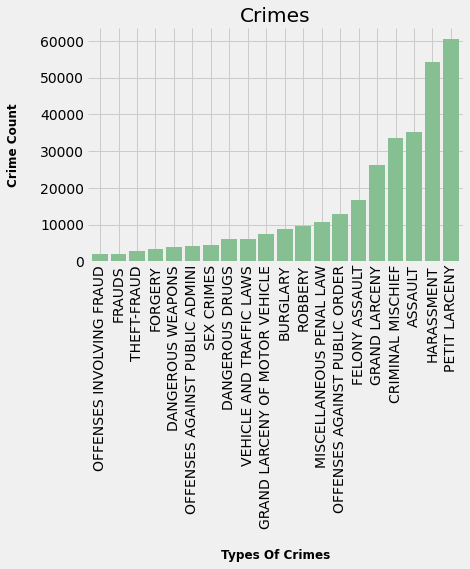

In [592]:
bar = df['OFNS_DESC'].value_counts()[:20].sort_values().plot(kind="bar", color='#86bf91', zorder=2, width=0.85, title = "Crimes")
bar.spines['right'].set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.spines['bottom'].set_visible(False)
bar.set_xlabel("Types Of Crimes", labelpad=20, weight='bold', size=12)
# Set y-axis label
bar.set_ylabel("Crime Count", labelpad=20, weight='bold', size=12)

plt.show()

Since Petit Larceny is the most common crime. I am going to do an analysis on that crime. As shown there are over 60,000 cases of petit larceny since COVID.

In [639]:
petit_larceny = df[df.OFNS_DESC.str.contains('PETIT LARCENY')]
display(petit_larceny)

,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column,monthly,month
16,941960858,BRONX,2021-07-13,17:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,NaN,PETIT LARCENY,07/13/2021,25-44,BLACK,M,1010183,241018,40.828184,-73.906295,"(40.82818438900005, -73.90629512299995)",POINT (-73.90629512299995 40.82818438900005),2021-07,07
45,570522952,MANHATTAN,2021-01-14,12:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,NaN,PETIT LARCENY,01/14/2021,UNKNOWN,UNKNOWN,D,999321,229329,40.796127,-73.945570,"(40.796126551000036, -73.94557011499995)",POINT (-73.94557011499995 40.796126551000036),2021-01,01
51,161752033,QUEENS,2021-09-29,22:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,09/30/2021,45-64,UNKNOWN,M,1008811,194221,40.699743,-73.911424,"(40.69974268200008, -73.91142368699997)",POINT (-73.91142368699997 40.69974268200008),2021-09,09
54,300688975,BROOKLYN,2021-09-25,18:30:00,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,09/27/2021,25-44,WHITE HISPANIC,F,1013581,188326,40.683548,-73.894247,"(40.68354775200004, -73.89424665199994)",POINT (-73.89424665199994 40.68354775200004),2021-09,09
57,495707686,BRONX,2021-07-15,08:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,09/27/2021,45-64,BLACK HISPANIC,M,1008427,245745,40.841164,-73.912623,"(40.84116361700006, -73.91262321499994)",POINT (-73.91262321499994 40.84116361700006),2021-07,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321314,349027851,QUEENS,2021-01-07,03:30:00,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,01/07/2021,UNKNOWN,UNKNOWN,D,1024425,191707,40.692785,-73.855128,"(40.69278523400004, -73.85512781899996)",POINT (-73.85512781899996 40.69278523400004),2021-01,01
321323,888086640,BRONX,2021-01-06,18:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,OPPOSITE OF,PETIT LARCENY,01/07/2021,25-44,BLACK,M,1010172,234265,40.809649,-73.906361,"(40.809649344000036, -73.906360954)",POINT (-73.906360954 40.809649344000036),2021-01,01
321324,594445596,BRONX,2020-10-01,13:21:00,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,01/04/2021,UNKNOWN,UNKNOWN,D,1022242,239684,40.824479,-73.862729,"(40.82447930500007, -73.86272873299998)",POINT (-73.86272873299998 40.82447930500007),2020-10,01
321330,252215072,QUEENS,2021-01-04,08:00:00,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,01/04/2021,25-44,WHITE,M,1008352,216512,40.760927,-73.912999,"(40.76092726300004, -73.91299919999993)",POINT (-73.91299919999993 40.76092726300004),2021-01,01


The graph of petit larceny shows that the majority of it came from the borough of Manhattan. With a total of 60,579 cases of petit larceny about 19175 were from Manhattan.

60579

MANHATTAN        19175
BROOKLYN         16099
QUEENS           13875
BRONX             9606
STATEN ISLAND     1824
Name: BOROUGH, dtype: int64

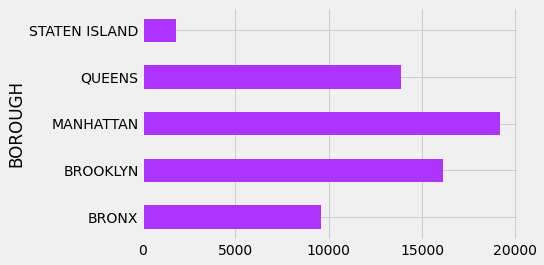

In [682]:
rename = petit_larceny.rename(columns={"BORO_NM": "BOROUGH"})
rename.groupby('BOROUGH').size().plot(kind = 'barh', color = '#AF33FF')
total = rename['monthly'].value_counts().sum()
display(total)
rename['BOROUGH'].value_counts()

The trend in crimes throughout the months since COVID-19 started. The line graph shows that crime rates were reletively low during lockdown and skyrocketed during the new year.

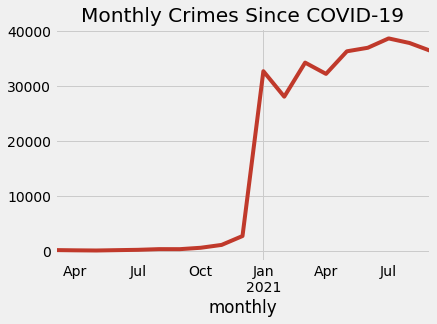

In [609]:
#df['month'] = df['RPT_DT'].str.findall('(\d{2})').apply(lambda x: x[0])
#display(df['month'].size())
graph = df.groupby('monthly').size().plot(kind = 'line', title ='Monthly Crimes Since COVID-19', color = '#C0392B')
bar.spines['right'].set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.spines['bottom'].set_visible(False)




The trend in crimes in each borough. The graph below shows that since COVID Brooklyn has been having the most crimes.


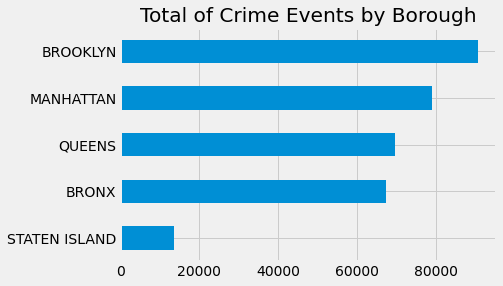

In [633]:
display(df['BORO_NM'].value_counts().sort_values().plot.barh(x='monthly', title = 'Total of Crime Events by Borough'))
bar.spines['right'].set_visible(False)
bar.spines['top'].set_visible(False)
bar.spines['left'].set_visible(False)
bar.spines['bottom'].set_visible(False)
graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
